In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Linear Regression

* Basis of many more recent and complex learning methods
* Quantitative (continuous real-valued, $\in R^1$) response (Y) as a linear function of one or more features (X)
    - e.g. height as a function of weight, temperature as a function of pressure

#### Linear Regression Model (single feature)

* **Data** ${((x_0,y_0),(x_1,y_1),...,(x_n,y_n)}, x_i \in R^d, y \in R$, n is the number of observations (i.e. samples)  


* The expected value of Y given X as a linear function of X (i.e. a line)

<div style="font-size: 125%;">
$$ E[Y|X] = f(X) = b_0 + b_1X$$
</div>

#### Uses

* Explain the relationship between response variable and feature variable(s)
    - Strength of association (i.e. the correlation)
    - How much of the variance of the response can be explained by the predictors?
* Predict the response variable from the feature variables

#### Types

* Simple Linear Regression
    - One quantitative feature
* Multivariate Regression
    - Two or more features
    - Quantitative or categorical features
* Polynomial Regression
    - Polynomial terms of single feature



## Simple Linear Regression

* Dependent variable (response, outcome variable) y is a function of a single independent (feature, predictor) variable x
* y = mx + b, where m is the slope and b is the intercept
    - $y,x,b \in R$
* Does y increase or decrease as x increases or decreases and by how much?


In [26]:
howell = pd.read_csv("Howell.csv",sep=';')
howell.tail()

,height,weight,age,male
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062496,21.0,0
542,71.120,8.051258,0.0,1
543,158.750,52.531624,68.0,1


In [27]:
adult = howell.query("age > 17")
adult.tail()

,height,weight,age,male
534,162.560,47.031821,27.0,0
537,142.875,34.246196,31.0,0
540,162.560,52.163080,31.0,1
541,156.210,54.062496,21.0,0
543,158.750,52.531624,68.0,1


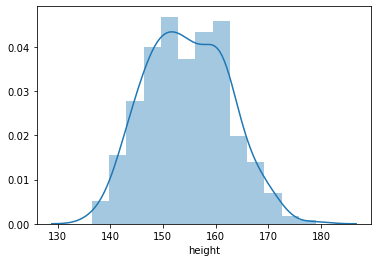

In [28]:
sns.distplot(adult.height);

#### Plot relationship

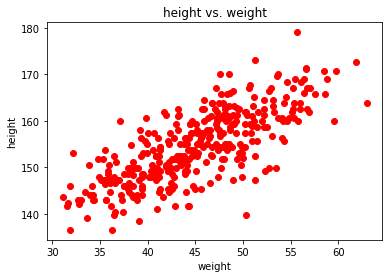

In [29]:
xlabel,ylabel = 'weight','height'
plt.scatter(adult.weight, adult.height, color = 'red')
plt.title(f'{ylabel} vs. {xlabel}')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

In [30]:
print('Missing values:\n',adult.isnull().sum())
print(f'\nCorrelation: {np.round(np.corrcoef(adult.weight, adult.height)[0,1],3)}')


Missing values:
 height    0
weight    0
age       0
male      0
dtype: int64

Correlation: 0.755


### Linear Model for Simple Linear Regression

* Dependent variable y (height) is a linear function of the independent variable x (weight)

<div style="font-size: 125%;">
$$ y = b_0 + b_1*x + \epsilon$$
</div>

y is the dependent variable  
x is the independent variable  
$b_0$ is the intercept  
$b_1$ is the slope  
$\epsilon$ is the error term (noise)

#### Fitting the model

* The parameters of the model are $b_0$ and $b_1$ 
* Learn $b_0$ and $b_1$ from the data
* $b_0$ and $b_1$ will determine a line through the data

### Goal: Find best fitting line

* Learn $b_0$ and $b_1$ to find the best fitting line
* Use best fitting line to predict new data
* The best fitting line is the line with the smallest error $\epsilon$
    - Its an **optimization** problem
* We want to fit the linear regression model to the data to estimate the values of the coefficients that minimize the error

<div style="font-size: 125%;">
$$\hat{y_i} = \hat{b}_0 + \hat{b}_1x_i$$
</div>

* $x_i$ is the ith value of the predictor
* $\hat{y_i}$ is the predicted response (or fitted value) for observation i
* $\hat{b}_0$ is an estimate of the intercept
* $\hat{b}_1$ is an estimate of the slope

### Model Code

#### sklearn.LinearRegression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* Methods
    - fit: fit model to training data
    - predict: predict new data
    - score: R-squared
    
* intercept_ and coef_ to get the fitted parameters

#### Create arrays from data frame

* x should be 2-dimensional

In [31]:
X = adult.weight.values.reshape(-1,1)
y = adult.height.values

X.shape, X.ndim, y.shape,y.ndim

((352, 1), 2, (352,), 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((281, 1), (71, 1), (281,), (71,))

#### Create linear model and fit to data

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Intercept: {model.intercept_} Slope: {model.coef_[0]} ')

Intercept: 114.9959683544341 Slope: 0.8791108768876056 


#### Predict new points

In [34]:
new = np.array([30.0,45.0,65.0])
predictions = model.predict(new.reshape(-1,1)) # Model fitted to 2-d array
predictions

array([141.36929466, 154.55595781, 172.13817535])

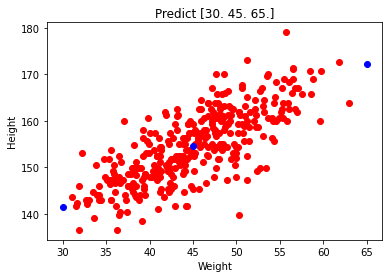

In [35]:
xlabel,ylabel = 'Weight','Height'

plt.scatter(X, y, color = 'red')
plt.plot(new,predictions,'bo')
plt.title(f'Predict {new}')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

### Regression Line

#### Predict each value of test set using the  model fitted to the training data

In [36]:
yhat = model.predict(X_test) # model.intercept_  + model.coef_[0]* X_test

In [37]:
yhat.shape

(71,)

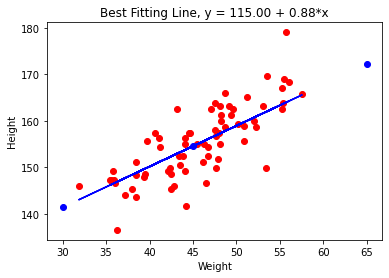

In [38]:
plt.scatter(X_test, y_test, color = 'red') # the data points
plt.plot(X_test, yhat, color = 'blue') # the predicted points on the line
plt.plot(new,predictions,'bo')
plt.title(f'Best Fitting Line, y = {model.intercept_:.2f} + {model.coef_[0]:.2f}*x')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

### Ordinary Least Squares (OLS) (i.e. how the model does it)

* Method for estimating the coefficients

#### Residuals: Difference between actual response value $y_i$ and fitted value $\hat{y}$

<div style="font-size: 125%;">
$$\epsilon_i = y_i - \hat{y_i}$$
</div> 

* Best fitting line is one that makes this prediction error "as small as possible" 

#### Minimize Square Error

* One way is to minimize the sum of the squared prediction errors: Ordinary Least Squares method 
* Find parameters $\hat{b}_0$ and $\hat{b}_1$ that minimizes 

<div style="font-size: 125%;">
$$RSS = SSE = \sum{\epsilon^2_i} = \sum{(y_i - \hat{y_i})^2} = \sum{(y_i - (\hat{b}_0 + \hat{b}_1x_i))^2}$$
</div>

 * RSS is called the Residual Sum of Squares, SSE = Sum of Squared Estimate of Errors

#### Plot Residuals

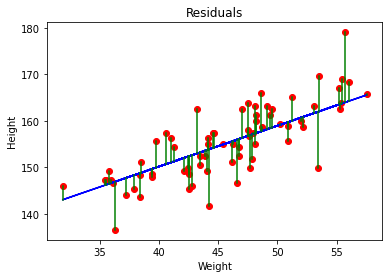

In [39]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, yhat, color = 'blue')
plt.title('Residuals')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
for i in range(len(yhat)):
    plt.plot((X_test[i],X_test[i]),(yhat[i],y_test[i]),'g-') #(x-coordinates from,to) (y-coordinates  from,to)    
#plt.savefig("Residuals.png")


##### Why squared error? why not absolute error>
 
* Distance measure
* Smooth function, differentiable

#### Least squares estimate for the coefficients $\hat{b}_0$ and $\hat{b}_1$
 
* Take the partial derivative with respect to $\hat{b}_1$, set it to 0 and solve for $\hat{b}_1$

<div style="font-size: 125%;">

$$\frac{\partial(RSS)}{\partial(\hat{b}_1)} = 0$$$$\hat{b}_1 = \frac{\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^n_{i=1}(x_i-\bar{x})^2}$$

$$\hat{b}_0 = \bar{y} - \hat{b}_1\bar{x}$$
</div>

$\bar{x}$ - mean of x  
$\bar{y}$ - mean of y

#### Note:

<div style="font-size: 125%;">
$$\hat{b}_1 = \frac{COV(x,y)}{VAR(x)}$$
</div>

#### Derivation

https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf


### Interpreting the coefficients
 
* $\hat{b}_0$: the value of the response when the predictor is equal to 0
    - The estimated mean of y, the dependent variable
* $\hat{b}_1$: the amount (in $\hat{b}_1$ units) that the mean response will increase or decrease by for every one unit increase in x.

#### What to $\hat{b}_0$ and $\hat{b}_1$ estimate?

* Population Mean
* Will get a different estimate with a different sample


### Assumptions of Least Squares
 
* **Linear** relationship between response and predictor variables
* Error terms are **Independent**
* The error term is **Normally distributed** $N(0,\sigma^2)$
* Homoscedastic: **Equal** variance of the error term
* Under these assumptions, the Method of Least Squares is the Maximum Likelihood Estimate (MLE)
    - MLE is a probabilistic method (will cover later)

In [40]:
def residuals(y,yhat):
    return y - yhat

Mean: 0.245, Standard Deviation: 4.929


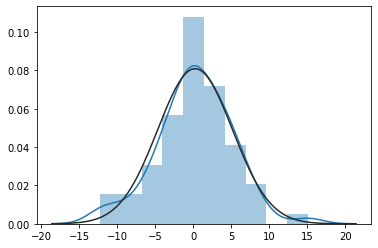

In [41]:
sns.distplot(residuals(y_test,yhat),fit=stats.norm);
params = stats.norm.fit(residuals(y_test,yhat))
print(f'Mean: {np.round(params[0],3)}, Standard Deviation: {np.round(params[1],3)}')

#### Check for Homoscedasticity

* Should not be funnel shaped

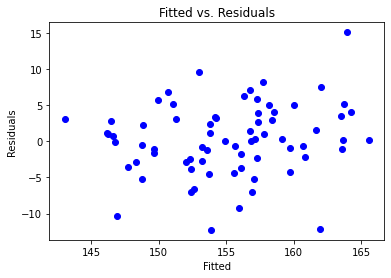

In [42]:
plt.plot(yhat,residuals(y_test,yhat),'bo')
plt.title("Fitted vs. Residuals")
plt.xlabel("Fitted")
plt.ylabel("Residuals");

### Accessing the accuracy of the model

 * Goodness of fit

####  R-squared (coefficient of determination) 
 
* Fraction of the total variance in y explained by the predictor(s)
* A number between 0 and 1 (i.e. independent of the scale of Y)
* $R^2$ close to 1 means a large proportion of the variance in the response is explained by the regression
* $R^2$ close to 0 means that not much of the variance is explained: wrong model, inherently high variance or both 
* Residual Sum of Squares (RSS): squared difference of actual response value and fitted values (i.e. the residuals)
* Total Sum of Squares (TSS): squared difference of actual response value and mean response value.

<div style="font-size: 125%;"> 
$$R^2 = \frac{TSS - RSS}{RSS} = 1 - \frac{RSS}{TSS}$$
$$TSS = \sum^n_{i=1}(y_i-\bar{y})^2$$
</div>

In [43]:
def rss(y,yhat):
    return(np.sum(residuals(y,yhat)**2))

In [44]:
def tss(y):
    return(np.sum((y - np.mean(y))**2))

def R_squared(y,yhat):
    return(1 - (rss(y,yhat)/tss(y)))

R_squared(y_test,yhat)

0.5998052517672163

#### R-squared from model

In [45]:
model.score(X_test,y_test)

0.5998052517672163

In [46]:
model.score(X_train,y_train)

0.5599383795079703

* For a single predictor, R-squared is equal to Pearson's Correlation squared
<div style="font-size: 125%;"> 
$$R^2 = r^2$$
</div> 

In [47]:
r = stats.pearsonr(X_test[:,0],y_test)[0]
r**2


0.6132641820967147

#### Mean Squared Error

* The average of the squared error (i.e. residuals)

$$MSE = \frac{1}{n}\sum(y - \hat{y})^2$$

* Root Mean Squared Error
    - Same unit as response variable

$$RMSE = \sqrt{\frac{1}{n}\sum(y - \hat{y})^2}$$

In [48]:
def mse(y,yhat):
    return np.mean((y - yhat)**2)

def rmse(y,yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [49]:
print(f'MSE: {mse(y_test,yhat)}\nRMSE: {rmse(y_test, yhat)}')

MSE: 24.355723216334788
RMSE: 4.935151792633615


### Exercises

1. Change value of random_state in train_test_split

2. Change test_size in train_test_split


## Multiple Linear Regression

* The response is a linear function of p predictors

<div style="font-size: 125%;">
$$Y = \beta_0 + \beta_1{X_1} + \beta_2{X_2} +...+\beta_p{X_p} + \epsilon $$
</div>

* $X_j$ is the jth predictor and $\beta_j$ is the average effect on Y of a one unit increase in $X_j$ holding all other predictors fixed
    
* Estimating Regression Coefficients
<div style="font-size: 125%;">
$$\hat{y} = \hat{b}_0 + \hat{b}_1{x_1} + \hat{b}_2{x_2} +...+ \hat{b}_p{x_p}$$
</div>
Minimize:
<div style="font-size: 125%;">
$$RSS = \sum^n_{i=1}(y_i - \hat{y}_i)^2 = \sum^n_{i=1}(y_i - \hat{b}_0 - \hat{b}_1{x_1} - \hat{b}_2{x_2} -...- \hat{b}_p{x_p})^2$$
</div>



### Matrix Formulation

* X is called the Design Matrix (1's in the first column for the intercept and the remaining columns are the predictors)  
* $\beta = (b_0,b_1,...b_n)$
* How to find the $\beta$ that minimizes the RSS? 
    - Take the partial derivative of RSS with respect to $\beta$, 
    - Set it equal to 0
    - Solve for $\beta$
* $X\beta$ is the dot product, $(y-X\beta)^T(y-X\beta)$ is the Squared Error

<div style="font-size: 125%;">
$$RSS(\beta) = (y-X\beta)^T(y-X\beta)$$
$$\frac{\partial{RSS}}{\partial{\beta}} = -2X^T(y-X\beta)$$
$$X^T(y-X\beta) = 0$$
$$X^Ty = X^TX\beta$$
$$\beta = (X^TX)^{-1}X^Ty$$
</div>
* Called the Normal Equation, closed form solution to the optimization

### Issues with multiple predictors

#### Which predictors best explain the response?

    
#### Is there multicolinearity (i.e. are two or more predictors highly correlated)?

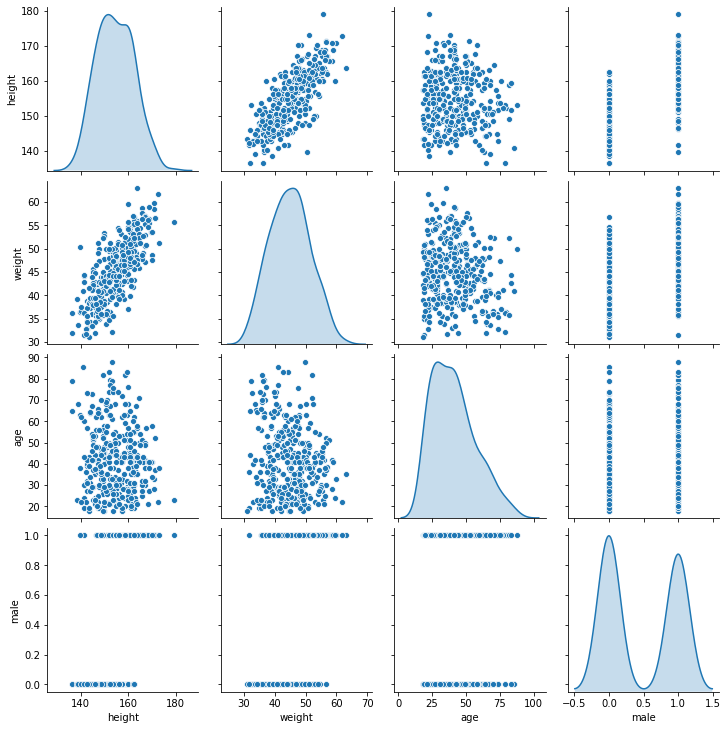

In [50]:
sns.pairplot(adult,diag_kind='kde');

In [51]:
adult.corr()

,height,weight,age,male
height,1.000000,0.754748,-0.101838,0.699993
weight,0.754748,1.000000,-0.172904,0.524453
age,-0.101838,-0.172904,1.000000,0.028455
male,0.699993,0.524453,0.028455,1.000000


In [52]:
X = adult.loc[:,['weight','age','male']].values
X.shape

(352, 3)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((281, 3), (71, 3), (281,), (71,))

In [54]:
scaler = StandardScaler()
X_train[:,0:2] = scaler.fit_transform(X_train[:,0:2])
X_test[:,0:2] = scaler.transform(X_test[:,0:2])
X_train.shape,X_test.shape

((281, 3), (71, 3))

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Intercept: {model.intercept_} Coefficients:: {model.coef_} ')

Intercept: 151.53478855610106 Coefficients:: [4.14632988 0.18080859 6.36363634] 


In [56]:
yhat = model.predict(X_test)
yhat.shape

(71,)

In [57]:
np.round(model.score(X_test,y_test),2)

0.73

In [58]:
np.round(rmse(y_test,yhat),2)

4.06

#### Exercise

1. Create and run a model with just weight and age as predictors. Compare with full model

## Polynomial Linear Regression
 
* Linear model assumes a linear relationship between response and predictors
* But what if relationship is non-linear, can we extend model to fit these cases
* Polynomial Regression

<div style="font-size: 115%;">
$$y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$$
</div>

* **This is still a linear model - linear in the coefficients**

<div style="font-size: 115%;">
$$Z = X^2$$
$$y = \beta_0 + \beta_1 X + \beta_2 Z + \epsilon$$
</div>


### Data

How does height vary with weight for all subjects?

* Dependent Variable: height
* Independent Varible: weight

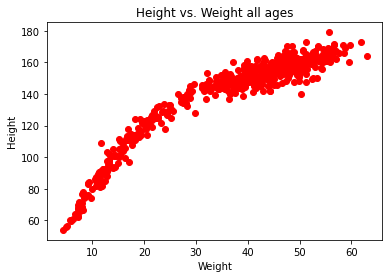

In [59]:
X = howell.weight.values.reshape(-1,1)
y = howell.height.values

plt.scatter(X, y, color = 'red')
plt.title(f'{ylabel} vs. {xlabel} all ages')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

#### Split data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((435, 1), (109, 1), (435,), (109,))

#### Fit model

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Predict test data

In [62]:
yhat = model.predict(X_test)
yhat.shape

(109,)

#### Model Parameters

In [63]:
print(f'Intercept: {model.intercept_} Coefficients: {model.coef_} ')

Intercept: 75.8356578639669 Coefficients: [1.75736011] 


#### Model Accuracy

In [64]:
print(f'R-squared: {np.round(model.score(X,y),2)}')

print(f'RMSE: {np.round(rmse(y_test,yhat),2)}')



R-squared: 0.89
RMSE: 9.38


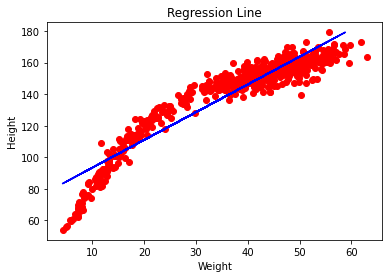

In [65]:
plt.scatter(X, y, color = 'red')
plt.plot(X_test, yhat, color = 'blue')
plt.title('Regression Line')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

### Try adding a quadratic term

<div style="font-size: 125%;">
$$ height = \beta_0 + \beta_1\cdot{weight} + \beta_2\cdot{weight^2} + \epsilon$$
</div>

In [66]:
howell['weight2'] = howell.weight**2
howell.head()

,height,weight,age,male,weight2
0,151.765,47.825606,63.0,1,2287.288637
1,139.700,36.485807,63.0,0,1331.214076
2,136.525,31.864838,65.0,0,1015.367901
3,156.845,53.041915,41.0,1,2813.444694
4,145.415,41.276872,51.0,0,1703.780162


#### Transform to array

In [67]:
X2 = howell.loc[:,['weight','weight2']].values
X2.shape

(544, 2)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((435, 2), (109, 2), (435,), (109,))

#### Fit quadratic model

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

#### Predict test data

In [70]:
yhat = model.predict(X_test)
yhat.shape

(109,)

#### Model Parameters

In [71]:
print(f'Intercept: {model.intercept_} Coefficients: {model.coef_} ')

Intercept: 45.67166423240846 Coefficients: [ 4.21578579 -0.03862632] 


#### Model Accuracy

In [72]:
print(f'R-squared: {np.round(model.score(X2,y),2)}')

print(f'RMSE: {np.round(rmse(y_test,yhat),2)}')



R-squared: 0.96
RMSE: 5.84


In [73]:
X_test[:,0].shape

(109,)

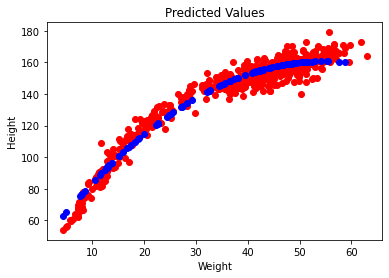

In [74]:
plt.scatter(X, y, color = 'red')
plt.plot(X_test[:,0], yhat, 'bo')
plt.title('Predicted Values')
plt.xlabel(xlabel)
plt.ylabel(ylabel);

#### Exercise

1. Add cubic term to model and compare with quadratic model.